In [6]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

In [7]:
# Load your cleaned CSV file
file_path = 'Data_clean.csv'  # Update this to your file path
df = pd.read_csv(file_path)

In [8]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def get_vader_score(text):
    # Check if the input is a string and not NaN or None
    if pd.isna(text) or not isinstance(text, str):
        return {'neg': 0, 'neu': 1, 'pos': 0, 'compound': 0}
    return sia.polarity_scores(text)
# Apply the function to your text column (update 'text_clean' to your column name if different)
df['vader_scores'] = df['Full_Post'].apply(get_vader_score)

# If you want to see the compound score directly
df['vader_compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/karishma1228/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Username,PostTitle,Date,Full_Post,PostURL,Upvotes,WordCount,vader_scores,vader_compound
0,u/sc1234,Fibonacci sequence approach,2012-12-11,Thanks to JoshTay for setting this up. Here's ...,http://www.reddit.com/r/Petioles/comments/14ow...,55,243,"{'neg': 0.035, 'neu': 0.868, 'pos': 0.097, 'co...",0.9075
1,u/[deleted],Please help.,2012-12-12,Alright i just want to start right off the bat...,http://www.reddit.com/r/Petioles/comments/14r4...,0,129,"{'neg': 0.042, 'neu': 0.774, 'pos': 0.184, 'co...",0.9454
2,u/IVtheGREEN,Everything is easy in thought.,2012-12-12,I have no desire to stop smoking. I am a 17 ye...,http://www.reddit.com/r/Petioles/comments/14r4...,8,129,"{'neg': 0.146, 'neu': 0.696, 'pos': 0.158, 'co...",0.4186
3,u/Cog-Rat,Balance Makes Perfect,2012-12-12,Iv'e found that when I rush home and pack my f...,http://www.reddit.com/r/Petioles/comments/14r3...,38,192,"{'neg': 0.091, 'neu': 0.825, 'pos': 0.084, 'co...",-0.3564
4,u/BitJuNkiE,Highschool conflicts,2012-12-12,"Hey r/petioles, I have some questions I would ...",http://www.reddit.com/r/Petioles/comments/14qt...,1,74,"{'neg': 0.112, 'neu': 0.782, 'pos': 0.106, 'co...",-0.3376


In [9]:
# Save the DataFrame with VADER scores to a new CSV file
output_file_path = 'output_with_vader_scores.csv'
df.to_csv(output_file_path, index=False)


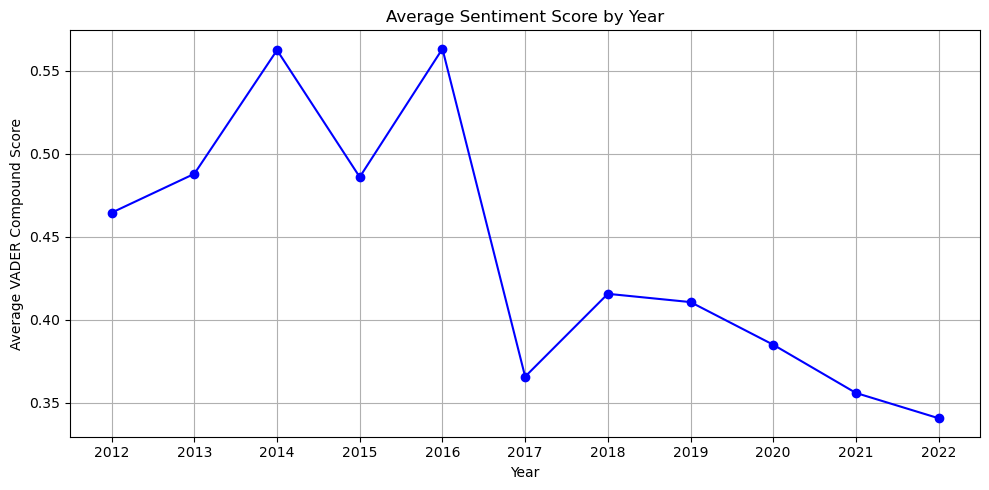

In [12]:
import matplotlib.pyplot as plt
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column and create a new 'Year' column
df['Year'] = df['Date'].dt.year

# Group by year and calculate mean sentiment per year
yearly_sentiment = df.groupby('Year')['vader_compound'].mean().reset_index()

# Plotting the time series of compound sentiment scores by year
plt.figure(figsize=(10, 5))
plt.plot(yearly_sentiment['Year'], yearly_sentiment['vader_compound'], marker='o', linestyle='-', color='b')
plt.title('Average Sentiment Score by Year')
plt.xlabel('Year')
plt.ylabel('Average VADER Compound Score')
plt.grid(True)
plt.xticks(yearly_sentiment['Year'])  # Ensure all years are shown as x-ticks
plt.tight_layout()
plt.show()


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


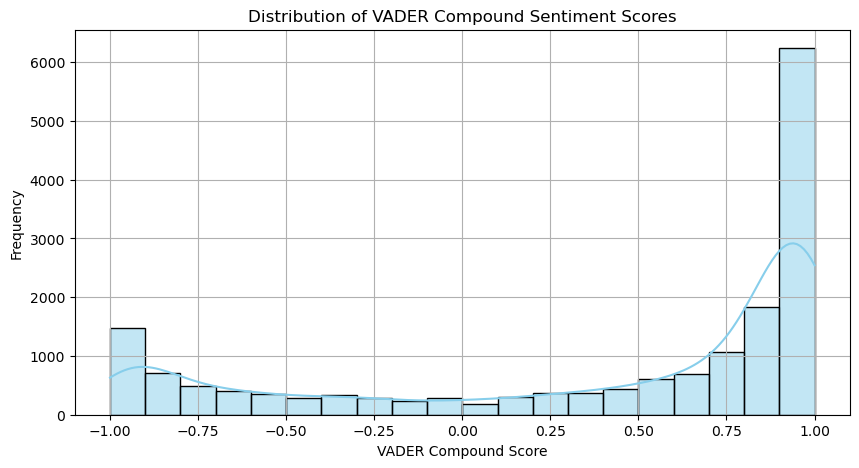

In [13]:
import seaborn as sns

# Visualization 1: Distribution of overall sentiment scores
plt.figure(figsize=(10, 5))
sns.histplot(df['vader_compound'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of VADER Compound Sentiment Scores')
plt.xlabel('VADER Compound Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [14]:
# Split vader_scores into separate columns
df['Negative'] = df['vader_scores'].apply(lambda x: x['neg'])
df['Neutral'] = df['vader_scores'].apply(lambda x: x['neu'])
df['Positive'] = df['vader_scores'].apply(lambda x: x['pos'])
df['Compound'] = df['vader_scores'].apply(lambda x: x['compound'])

# Drop the original vader_scores column
df.drop('vader_scores', axis=1, inplace=True)

print(df)

                     Username  \
0                    u/sc1234   
1                 u/[deleted]   
2                u/IVtheGREEN   
3                   u/Cog-Rat   
4                 u/BitJuNkiE   
...                       ...   
17005            u/KaKapowpow   
17006  u/TimelyInspection4129   
17007           u/VampireNugz   
17008    u/throwawayadvice102   
17009              u/scorpost   

                                               PostTitle       Date  \
0                            Fibonacci sequence approach 2012-12-11   
1                                           Please help. 2012-12-12   
2                         Everything is easy in thought. 2012-12-12   
3                                  Balance Makes Perfect 2012-12-12   
4                                   Highschool conflicts 2012-12-12   
...                                                  ...        ...   
17005       What are your favorite tools for moderation? 2022-12-31   
17006                              

In [15]:
# Drop the original vader_scores column
df.drop('Compound', axis=1, inplace=True)

print(df)

                     Username  \
0                    u/sc1234   
1                 u/[deleted]   
2                u/IVtheGREEN   
3                   u/Cog-Rat   
4                 u/BitJuNkiE   
...                       ...   
17005            u/KaKapowpow   
17006  u/TimelyInspection4129   
17007           u/VampireNugz   
17008    u/throwawayadvice102   
17009              u/scorpost   

                                               PostTitle       Date  \
0                            Fibonacci sequence approach 2012-12-11   
1                                           Please help. 2012-12-12   
2                         Everything is easy in thought. 2012-12-12   
3                                  Balance Makes Perfect 2012-12-12   
4                                   Highschool conflicts 2012-12-12   
...                                                  ...        ...   
17005       What are your favorite tools for moderation? 2022-12-31   
17006                              

In [27]:
df.head()

,Username,PostTitle,Date,Full_Post,PostURL,Upvotes,WordCount,vader_compound,Year,Negative,Neutral,Positive
0,u/sc1234,Fibonacci sequence approach,2012-12-11,Thanks to JoshTay for setting this up. Here's ...,http://www.reddit.com/r/Petioles/comments/14ow...,55,243,0.9075,2012,0.035,0.868,0.097
1,u/[deleted],Please help.,2012-12-12,Alright i just want to start right off the bat...,http://www.reddit.com/r/Petioles/comments/14r4...,0,129,0.9454,2012,0.042,0.774,0.184
2,u/IVtheGREEN,Everything is easy in thought.,2012-12-12,I have no desire to stop smoking. I am a 17 ye...,http://www.reddit.com/r/Petioles/comments/14r4...,8,129,0.4186,2012,0.146,0.696,0.158
3,u/Cog-Rat,Balance Makes Perfect,2012-12-12,Iv'e found that when I rush home and pack my f...,http://www.reddit.com/r/Petioles/comments/14r3...,38,192,-0.3564,2012,0.091,0.825,0.084
4,u/BitJuNkiE,Highschool conflicts,2012-12-12,"Hey r/petioles, I have some questions I would ...",http://www.reddit.com/r/Petioles/comments/14qt...,1,74,-0.3376,2012,0.112,0.782,0.106


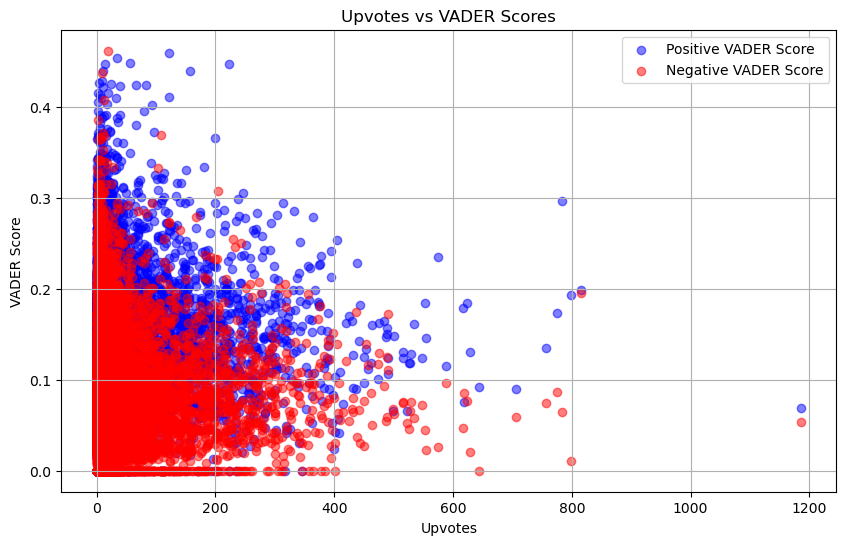

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot for Positive VADER Score vs Upvotes
plt.scatter(df['Upvotes'], df['Positive'], color='blue', alpha=0.5, label='Positive VADER Score')

# Scatter plot for Negative VADER Score vs Upvotes
plt.scatter(df['Upvotes'], df['Negative'], color='red', alpha=0.5, label='Negative VADER Score')

plt.title('Upvotes vs VADER Scores')
plt.xlabel('Upvotes')
plt.ylabel('VADER Score')
plt.legend()
plt.grid(True)
plt.show()


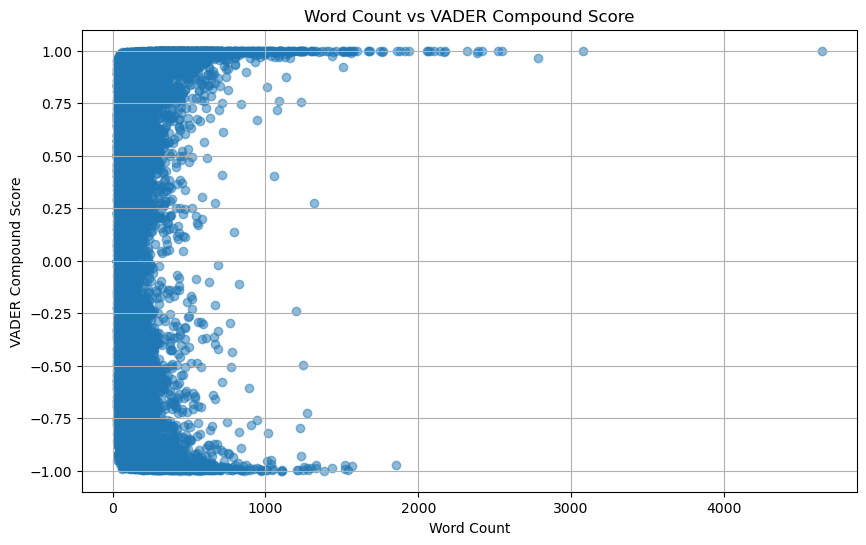

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['WordCount'], df['vader_compound'], alpha=0.5)
plt.xlabel('Word Count')
plt.ylabel('VADER Compound Score')
plt.title('Word Count vs VADER Compound Score')
plt.grid(True)
plt.show()
